In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from utils import plot_data

In [2]:
file_names = os.listdir('stats')
base_path = 'stats/'
data = {}
for file_name in file_names:
    if file_name.endswith('.csv'):
        data[file_name] = pd.read_csv(base_path + file_name, sep=';')
        name = file_name.split('_')[2]
        data[file_name]['name'] = 'Intrinsic PPO' if name == 'intr' else 'PPO'
        data[file_name]['timesteps'] = data[file_name]['Unnamed: 0']
        data[file_name]['episodic_return'] = data[file_name]['amax']

In [3]:
intr_frames = [df for name, df in data.items() if name in ['ep_return_intr_1.csv', 'ep_return_intr_2.csv', 'ep_return_intr_3.csv']]
ppo_frames = [df for name, df in data.items() if name in ['ep_return_ppo_1.csv', 'ep_return_ppo_2.csv', 'ep_return_ppo_3.csv']]
frames = intr_frames + ppo_frames

Text(0.5, 1.05, 'Hopper Medium')

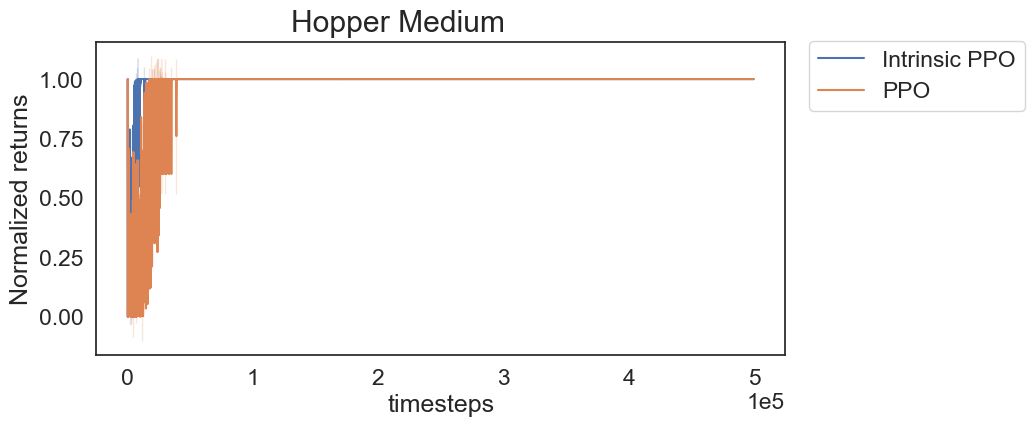

In [5]:
alpha = 0.2
fig, axs = plt.subplots(1, 1, figsize=(8,4))
plot_data(frames, xaxis='timesteps', value='episodic_return', condition='name', alpha=alpha, ax=axs, legend=True)
# rename y axis to "Normalized returns"
axs.set_ylabel("Normalized returns")
# remove legend title 
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs.get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
fig.suptitle("Hopper Medium", y=1.05)

Text(0.5, 1.05, 'Gridworld: PPO VS Intrinsic PPO')

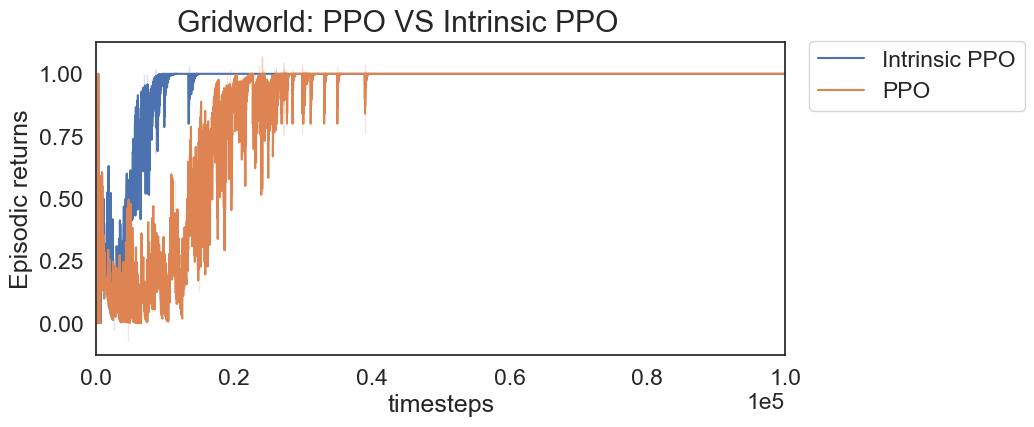

In [10]:
alpha = 0.2
fig, axs = plt.subplots(1, 1, figsize=(8,4))
plot_data(frames, xaxis='timesteps', value='episodic_return', condition='name', alpha=alpha, ax=axs, legend=True)
# rename y axis to "Normalized returns"
axs.set_ylabel("Episodic returns")
# remove legend title 
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs.get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
axs.set_xlim(0, 100_000)
fig.suptitle("Gridworld: PPO VS Intrinsic PPO", y=1.05)